# Plotting for Exploratory data analysis (EDA)

# Basic Terminology

* What is EDA?
* Data-point/vector/Observation
* Data-set.
* Feature/Variable/Input-variable/Dependent-varibale
* Label/Indepdendent-variable/Output-varible/Class/Class-label/Response label
* Vector: 2-D, 3-D, 4-D,.... n-D

Q. What is a 1-D vector: Scalar



#**Haberman dataset**

 Dataset: Haberman Dataset: https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival
* A simple dataset to learn the basics.
*  Objective: Classify a new Query Data as belonging to one of the 2 class given the 2 features.
* Importance of domain knowledge.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load Iris.csv into a pandas dataFrame.
haberman = pd.read_csv("../input/haberman.csv",header=None)

In [2]:
# (Q) how many data-points and features?
print (haberman.shape)

(306, 4)


In [3]:
#(Q) What are the column names in our dataset?
print (haberman.columns)

Int64Index([0, 1, 2, 3], dtype='int64')


In [4]:
#above there is No Specific Name for columns are Given,so we need to Specify columns Name first for Better Understanding.
#(Q) How many data points for each class are present? 
#(or) How many Survival_Status for each species are present?
haberman.columns=['Age','Op_Year','axil_nodes','Surv_status']
haberman["Surv_status"].value_counts()
# balanced-dataset vs imbalanced datasets
#Haberman is a Imbalanced dataset as the number of data points for class value 1 is Much greater than 2.

1    225
2     81
Name: Surv_status, dtype: int64

# 2-D Scatter Plot

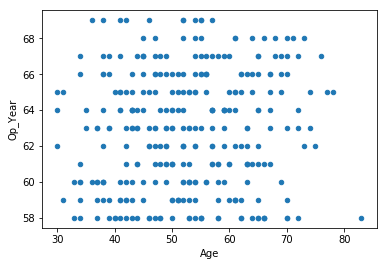

In [5]:
#2-D scatter plot:
#ALWAYS understand the axis: labels and scale.

haberman.plot(kind='scatter', x='Age', y='Op_Year') ;
plt.show()

#cannot make much sense out it. 
#What if we color the points by thier class-label/flower-type.

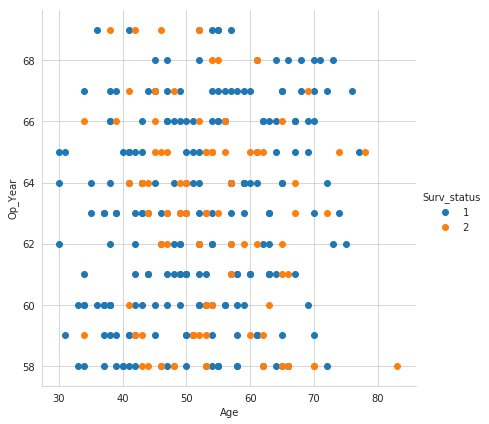

In [6]:
# 2-D Scatter plot with color-coding for each Survival type/class.
# Here 'sns' corresponds to seaborn. 
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="Surv_status", height=6) \
   .map(plt.scatter, "Age", "Op_Year") \
   .add_legend();
plt.show();
# Very difficult to Seperate red Point and Green Point by Using Simple Line. 
# Can we draw multiple 2-D scatter plots for each combination of features?
# How many cobinations exist? 3C2 = 3.

**Observation(s):**
1. Using Age and Op_Year features, we cannot distinguish class_1(Green) from class_2(Red).
2. Seperating class_1(Green) from class_2(Red) is much harder as they have considerable overlap.

## 3D Scatter plot

# Pair-plot

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


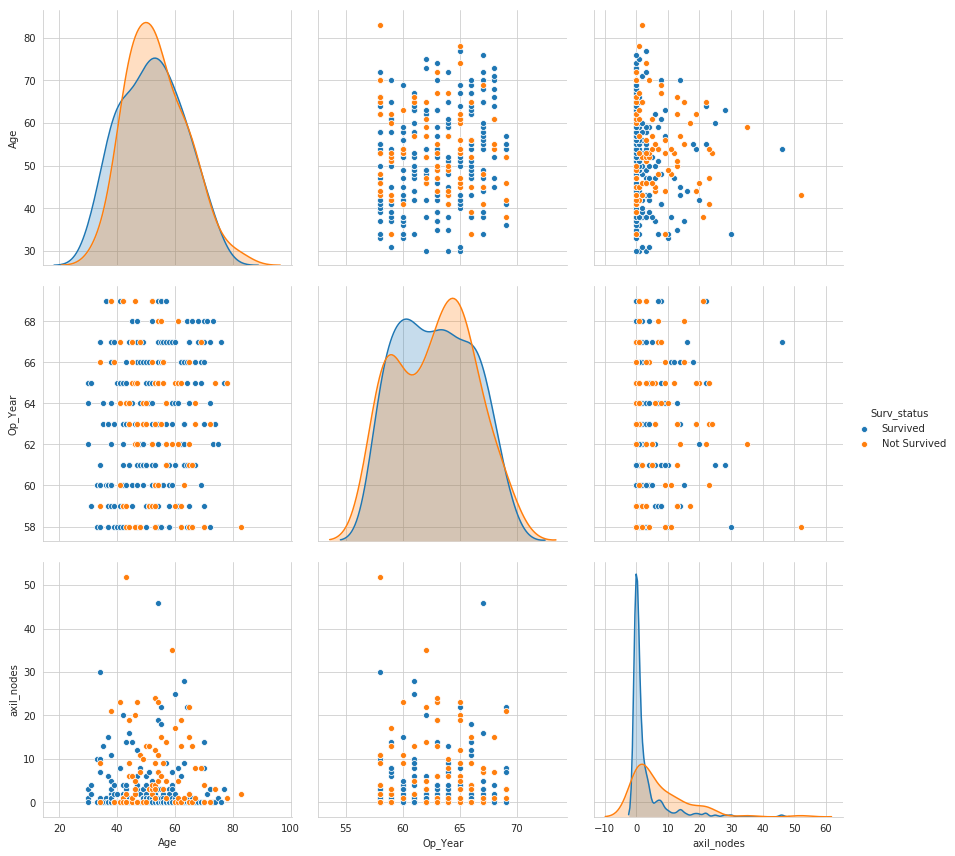

In [7]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
def partition(x):
    if x==1:
        return 'Survived'
    else:
        return "Not Survived"
#here we have taken 1 as Survived and 2 as Not Survived.     
haberman['Surv_status']=haberman['Surv_status'].map(partition)           
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman,hue='Surv_status',height=4);
plt.show()
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

**Observations**
1. No two feature can seperate Blue color and Red color point.
2. we cannot prepare our model simple using IF else condition.

# Histogram, PDF, CDF

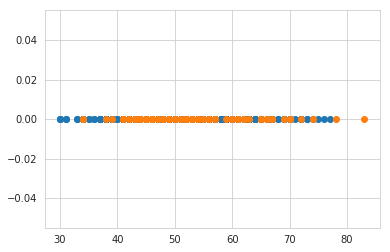

Index(['Age', 'Op_Year', 'axil_nodes', 'Surv_status'], dtype='object')

In [8]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of Age.
import numpy as np
haberman_Supervised = haberman.loc[haberman["Surv_status"] == "Survived"];
haberman_NSupervised= haberman.loc[haberman["Surv_status"] == "Not Survived"];

plt.plot(haberman_Supervised["Age"], np.zeros_like(haberman_Supervised["Age"]), 'o')
plt.plot(haberman_NSupervised["Age"], np.zeros_like(haberman_NSupervised['Age']), 'o')
plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?
haberman.columns

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


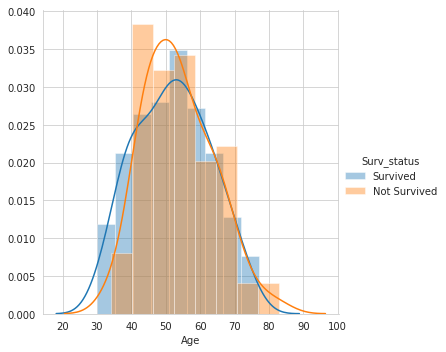

In [9]:
sns.FacetGrid(haberman, hue="Surv_status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.show();



/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


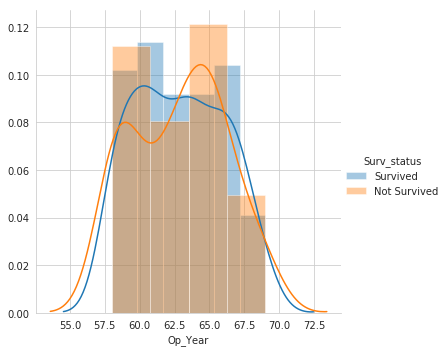

In [10]:
sns.FacetGrid(haberman, hue="Surv_status", size=5) \
   .map(sns.distplot, "Op_Year") \
   .add_legend();
plt.show();

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


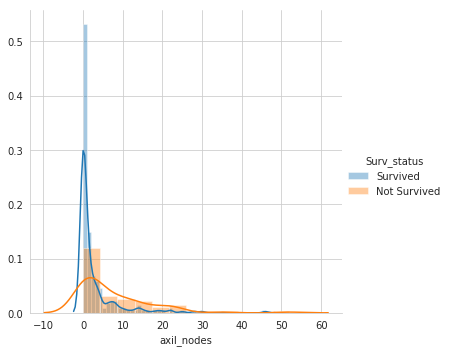

In [11]:
sns.FacetGrid(haberman, hue="Surv_status", size=5) \
   .map(sns.distplot, "axil_nodes") \
   .add_legend();
plt.show();

In [12]:
#we have not much sense of heaving dist of plot as shown above.
#we cannot create appropriate model by using single variate analysis of Distribution plot.

In [13]:
# Histograms and Probability Density Functions (PDF) using KDE
# How to compute PDFs using counts/frequencies of data points in each window.
# How window width effects the PDF plot.


# Interpreting a PDF:
## why is it called a density plot?
## Why is it called a probability plot?
# Do some of these plots look like a bell-curve you studied in under-grad?
# Gaussian/Normal distribution.
# What is "normal" about normal distribution?
# e.g: Hieghts of male students in a class.
# One of the most frequent distributions in nature.


[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


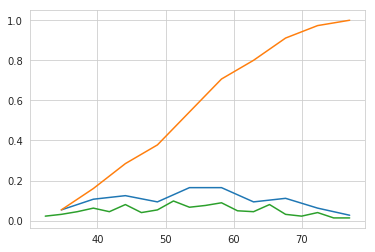

In [14]:

# Need for Cumulative Distribution Function (CDF)
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of Age

counts, bin_edges = np.histogram(haberman_Supervised['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)


counts, bin_edges = np.histogram(haberman_Supervised['Age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();


[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


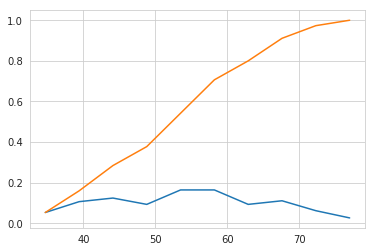

In [15]:
# Need for Cumulative Distribution Function (CDF)
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of Age

counts, bin_edges = np.histogram(haberman_Supervised['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


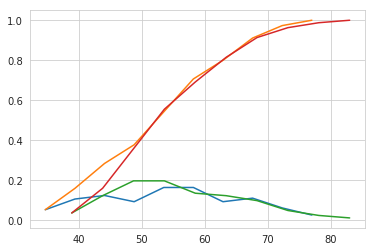

In [16]:
# Plots of CDF of Age for various types of Varies Classes.

counts, bin_edges = np.histogram(haberman_Supervised['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(haberman_NSupervised['Age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show();

# Mean, Variance and Std-dev

In [17]:
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(haberman_Supervised["Age"]))
#Mean with an outlier.
print(np.mean(np.append(haberman_Supervised["Age"],1000)));
print(np.mean(haberman_NSupervised["Age"]))

print("\nStd-dev:");
print(np.std(haberman_Supervised["Age"]))
print(np.std(haberman_NSupervised["Age"]))


Means:
52.01777777777778
56.21238938053097
53.67901234567901

Std-dev:
10.98765547510051
10.10418219303131


# Median, Percentile, Quantile, IQR, MAD

In [18]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(haberman_Supervised["Age"]))
#Median with an outlier
print(np.median(np.append(haberman_Supervised['Age'],5000)));
print(np.median(haberman_NSupervised["Age"]))


print("\nQuantiles:")
print(np.percentile(haberman_Supervised["Age"],np.arange(0, 100, 25)))
print(np.percentile(haberman_NSupervised["Age"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(haberman_Supervised["Age"],90))
print(np.percentile(haberman_NSupervised["Age"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(haberman_Supervised["Age"]))
print(robust.mad(haberman_Supervised["Age"]))



Medians:
52.0
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
13.343419966550417


# Box plot and Whiskers

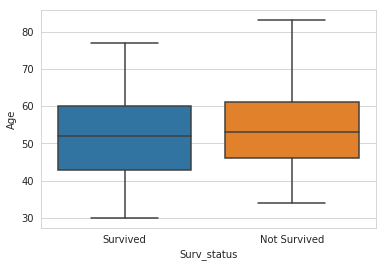

In [19]:

#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='Surv_status',y='Age', data=haberman)
plt.show()

# Violin plots

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


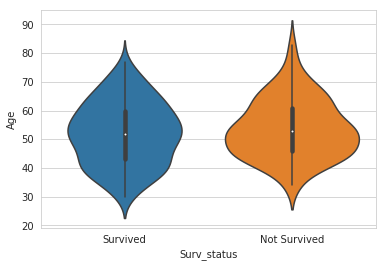

In [20]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot

sns.violinplot(x="Surv_status", y="Age", data=haberman, size=8)
plt.show()


# Univariate, bivariate and multivariate analysis.

In [21]:


#Def: Univariate, Bivariate and Multivariate analysis.


# Multivariate probability density, contour plot.


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


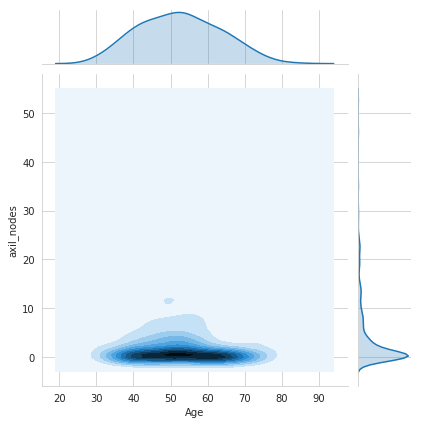

In [22]:
#2D Density plot, contors-plot
sns.jointplot(x="Age", y="axil_nodes", data=haberman, kind="kde");
plt.show();
